<a href="https://colab.research.google.com/github/YLiu95/Citadel_Securities_Quantitative_Finance_Competition/blob/main/Citadel_Securities_Quant_Trading_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Citadel Securities Quant Trading Competition


# Tabel of contents:
1. [Non-Skewed Price Making](#scrollTo=VNSfo0l7tq7p) 
>[Results Visualisation](#scrollTo=2a7BoxywvBQ6)

2. [Skewed Price Making](#scrollTo=ylpdvBUSdnU3)
>[Results Visualisation](#scrollTo=WeiZh9QednU4)

[End of the Document](#scrollTo=w5e9COsGwFWL)

## Non-Skewed Price Making

In [ ]:
from matplotlib import pyplot as plt
from pandas import *
from AmplifyQuantTrading import Data
from AmplifyQuantTrading import Exchange
from AmplifyQuantTrading import MarketMaker
from AmplifyQuantTrading import HedgeFund as hf

The code below will assign the prices data series and price_requests data series to the two variables to make them available throughout the project.

In [ ]:
prices = Data.price_series()
price_requests = Data.price_requests()

### a) Iterate through the first ten price requests and append to the test_requests list.

In [ ]:
test_requests = []

In [ ]:
for index in range(0, 10): # Select the first ten prices in the data.
    test_requests.append(price_requests[index])

### b) Identify the reference prices for the first ten requests

In [ ]:
request_with_prices = []

In [ ]:
for price in prices:  # Iterate through all the prices to match them against the price requests.
    for request in test_requests:  # Iterate through the requests from the Hedge Funds.
        if price[0] == request[0] and price[1] == request[1]:
            request_with_prices.append((request, price[2]))

### c) Create a non-skewed bid and offer for the request_with_prices

### **QuotedTrade object**
This object will be used to quote trades and send them to the hedge funds. The object contains the following attributes:
* ticker: String
* trade_volume: Integer
* ref_price: Float
* bid_price: Float
* offer_price: Float
* date: Integer

In [ ]:
class QuotedTrade:
    def __init__(self, ticker, trade_volume, ref_price, bid_price, offer_price,
                 date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date

    def __str__(self):
        return f'Trade Request for {self.ticker}, {self.trade_volume} shares @ {self.ref_price} on {self.date}. Bid Price: {self.bid_price} and Offer Price: {self.offer_price}'

    def __repr__(self):
        return f'QuotedTrade(ticker={self.ticker}, trade_volume={self.trade_volume}, ref_price={self.ref_price}, bid_price={self.bid_price}, offer_price={self.offer_price}, date={self.date})'

In [ ]:
for matched in request_with_prices:
    bid_price = matched[1] * 0.98 # Create the bid spread
    
    offer_price = matched[1] * 1.02 # Create the offer spread
    
    # Create the QuotedTrade object and append it to the quoted_trades list.
    quote = QuotedTrade(matched[0][0], matched[0][2], matched[1], bid_price, offer_price, matched[0][1])
    quoted_trades.append(quote)

### d) Interact with the Hedge Fund to Show quoted_trades and recieve a response.

Using the *quoted_trades* list interact with the HF object to receive a "Buy, Sell, Refuse" response from the HF and store these *HfResponse* objects in an list called *hf_responses*.

##### Sends the quoted_trade object to the hedge fund to make a decision for a trade.
```python
hf.show(QuotedTrade)
```
***Parameters:***
* QuotedTrade: Custom Object

***Returns:***
* HfResponse( ticker: String, trade_volume: Integer, trade_price: Float, hf_action: String, ref_price: Float, bid_price: Float, offer_price: Float, date: Integer )

In [ ]:
for trade in quoted_trades:
    response = hf.show(trade) # Assign the response to the return from the hf.show()
    hf_responses.append(response)

### e) Begin logging the trade actions with the Market Maker class and functions.

### Initialise the Market Maker Object


#### Market Maker object contains:
* current_positions: Dictionary of current_position objects - {ticker: String, current_position: Object}
  * current_position: Custom Object
    * ticker: String
    * position_volume: Integer
    * open_price: Float
    * date: Integer
* quoted_trades: List of quoted_trade objects - [quoted_trade, quoted_trade, …]
  * quoted_trade: Custom Object
* completed_trades: List of completed_trade objects - [completed_trade, completed_trade, ...]
  * completed_trade: Custom Object
* ETF_positions: List of completed_trade objects - [completed_trade, completed_trade, ...]
  * completed_trade: Custom Object


In [ ]:
mm = MarketMaker.mm()


#### Add a trade to Market Makers history
```python
mm.add_quoted_trade(QuotedTrade)
```
***Parameters:***
* QuotedTrade: Custom Object

***Returns:***
* String: Indicating a successfully added trade or failed added trade.

In [ ]:
for quote in quoted_trades:
    # Use the function to add each quote to the Market Maker
    mm.add_quoted_trade(quote)

#### Create another object to be used during this event following a similar structure to the QuotedTrade class.

**Create a CompletedTrade object**

This object will be used to log successful trades to the market maker object. The object should contain the following attributes:
* ticker: String
* trade_volume: Integer
* trade_price: Float
* mm_action: String
* ref_price: Float
* bid_price: Float
* offer_price: Float
* date: Integer

In [ ]:
class CompletedTrade:
    def __init__(self, ticker, trade_volume, trade_price, mm_action, ref_price, bid_price, offer_price, date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.trade_price = trade_price
        self.mm_action = mm_action
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date

#### Interact with the MM object to store the CompletedTrade objects into the logs.

#### Update the Market Makers current positions.
```python
mm.add_trade(CompletedTrade)
```
***Parameters:***
* CompletedTrade: Custom Object

***Returns:***
* String: Indicating a successfully added trade or failed added trade.

In [ ]:
for response in hf_responses: # Loops through the hf_responses for each response
    # Collection of conditionals for "buy", "sell" and "refuse"
    if response.hf_action == "buy": # Identifies the HF action to be converted into the MM action
        mm_action = "sell"
    elif response.hf_action == "sell":
        mm_action = "buy"
    else:
        mm_action = "refuse"
    
    trade = CompletedTrade(response.ticker, response.trade_volume, response.trade_price, mm_action, response.ref_price, 
                           response.bid_price, response.offer_price, response.date)
    mm.add_trade(trade)

### f) Create a graphical output for all the AAPL quoted trades.
 

#### Initialise the plot with the <python>fig, axes = plt.subplots() </python> function. 
#### Populate the lists given, and plot them using <python>axes.plot()</python>.

In [ ]:
# Initalises the lists to store all the data
bid_data = []
offer_data = []
quote_dates = []

for trade in mm.completed_trades: # Iterate through the completed trades to find the AAPL trades and store the data.
    # Append the bid_data and offer_data and quote_dates.
    if trade.ticker == "AAPL":
        bid_data.append(trade.bid_price)
        offer_data.append(trade.offer_price)
        quote_dates.append(trade.date)


The quote_dates, bid_data and offer_data are now assigned to the corresponding list. 

#### Next find the reference prices for AAPL as we have gaps in our dates.

In [ ]:
ref_data = []
ref_dates = []

for price in prices: # Iterate through the quotes to find each AAPL ticker and matching price data.
    # Add filtering to ensure we find AAPL trades and all trades upto the last quote_dates.
    if price[0] == "AAPL" and price[1] <= quote_dates[-1]:
    # Append the ref_data and ref_dates
        ref_data.append(price[2])
        ref_dates.append(price[1])

#### results visualisation

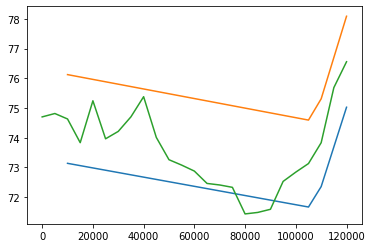

In [ ]:
axes = plt.subplot() # Creates the Axis.

axes.plot(quote_dates, bid_data) # Plot the X and Y axis using the quote_dates and bid_data.
axes.plot(quote_dates, offer_data)
axes.plot(ref_dates, ref_data)

## Skewed Price Making

In [ ]:
mm = MarketMaker.mm()

In [ ]:
def calculate_spread(quote):
    volume = mm.current_positions[quote[0][0]].position_volume
    if volume > 0:
        bid_price = quote[1] * 0.93  # Give the bid spread
        offer_price = quote[1] * 1.01 # Give the offer spread
    elif volume < 0:
        bid_price = quote[1] * 0.99
        offer_price = quote[1] * 1.07
    else:
        bid_price = quote[1] * 0.98
        offer_price = quote[1] * 1.02
    # Complete all other scenarios for the volume.
    # Create a QuotedTrade to be returned from this function and log it.
    trade = QuotedTrade(quote[0][0], quote[0][2], quote[1], bid_price, offer_price, quote[0][1])
    mm.add_quoted_trade(trade)
    return trade

#### `def handle_response(trade):` 
The **QuotedTrade** object is shown using the HF's function, to get the HF's response.

In [ ]:
def handle_response(trade):
    # Add the logic here for handling the response action.
    if trade.hf_action == "buy":
        mm_action = "sell"
    elif trade.hf_action == "sell":
        mm_action = "buy"
    else:
        mm_action = "refuse"
    # Create and Store the CompletedTrade into your logs.
    completed = CompletedTrade(trade.ticker, trade.trade_volume, trade.trade_price, mm_action, trade.ref_price, trade.bid_price,
                              trade.offer_price, trade.date)
    mm.add_trade(completed)

### Call the functions

In [ ]:
for request in price_requests:
    for price in prices:
        if price[0] == request[0] and price[1] == request[1]:
            quote = calculate_spread( (request, price[2]) )
            response = hf.show(quote)
            trade = handle_response(response)

### Create graphical outputs

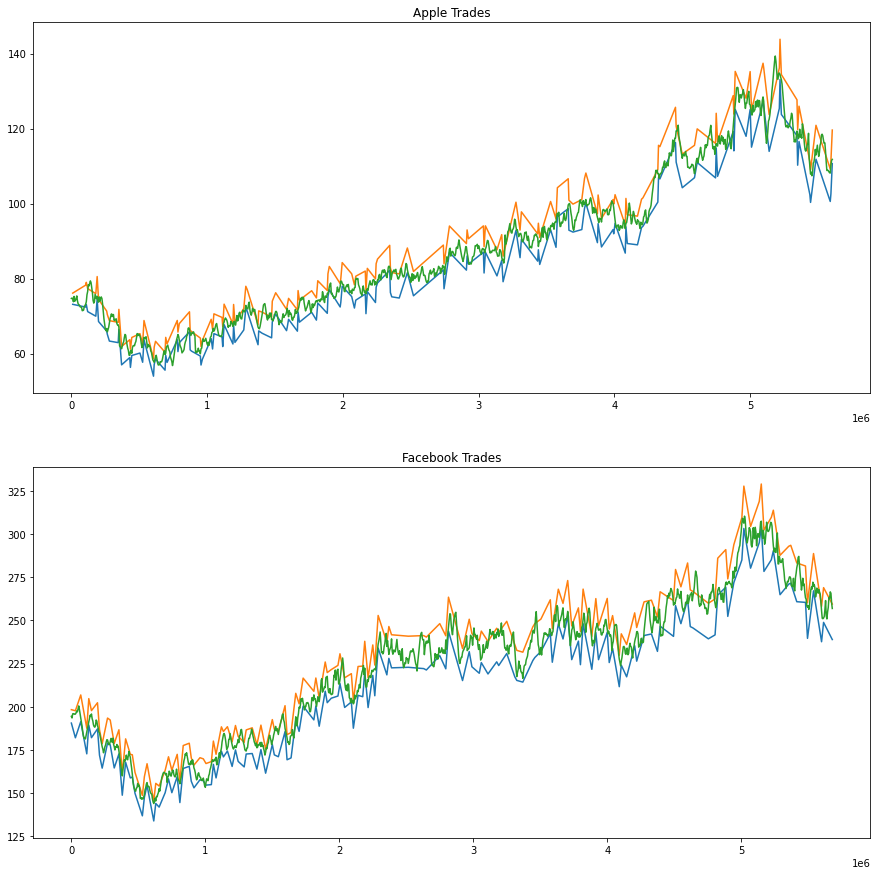

In [ ]:
completed_trades = mm.completed_trades
fig, (ax1, ax2) = plt.subplots(2, figsize = (15, 15))

for my_ticker in ["AAPL", "FB"]:
    
    bid_data = []
    offer_data = []
    quote_dates = []
    
    ref_data = []
    ref_dates = []
    
    for trade in completed_trades:
        if trade.ticker == my_ticker:
            bid_data.append(trade.bid_price)
            offer_data.append(trade.offer_price)
            quote_dates.append(trade.date)
    
    for price in prices:
        if price[0] == my_ticker and price[1] <= quote_dates[-1]:
            ref_data.append(price[2])
            ref_dates.append(price[1])
    
    
    if my_ticker == "AAPL":
        ax1.plot(quote_dates, bid_data)
        ax1.plot(quote_dates, offer_data)
        ax1.plot(ref_dates, ref_data)
        ax1.set_title("Apple Trades")
    else:
        ax2.plot(quote_dates, bid_data)
        ax2.plot(quote_dates, offer_data)
        ax2.plot(ref_dates, ref_data)
        ax2.set_title("Facebook Trades")
            

# End of the Document